In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [117]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
df = pd.read_excel('dataset\Dataset Text.xlsx')

In [119]:
df = df.drop(['Kalimat'],axis=1)

In [120]:
df.head()

,Label,Text
0,supports,competition can effectively promote the develo...
1,attacks,competition can effectively promote the develo...
2,supports,what we acquired from team work is not only ho...
3,supports,through cooperation children can learn about i...
4,supports,all of these skills help them to get on well w...


Text(0.5, 1.0, 'Label Data Distribution')

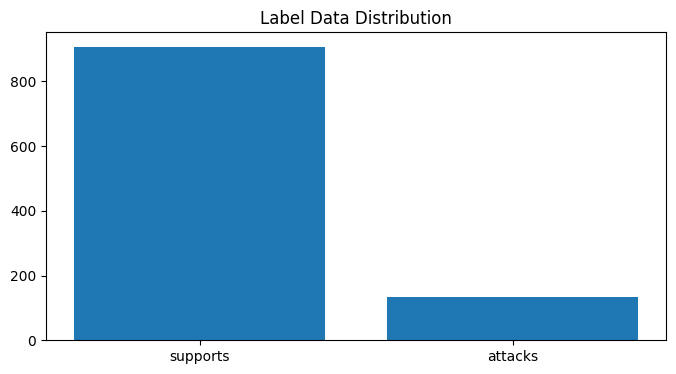

In [121]:
val_count = df.Label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title('Label Data Distribution')

In [122]:
df['text_id'] = df['Label'].factorize()[0]
text_id_df = df[['Label', 'text_id']].drop_duplicates().sort_values('text_id')
text_to_id = dict(text_id_df.values)
id_to_text = dict(text_id_df[['text_id', 'Label']].values)
df.head()

,Label,Text,text_id
0,supports,competition can effectively promote the develo...,0
1,attacks,competition can effectively promote the develo...,1
2,supports,what we acquired from team work is not only ho...,0
3,supports,through cooperation children can learn about i...,0
4,supports,all of these skills help them to get on well w...,0


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Text).toarray()
labels = df.text_id
features.shape

(1039, 1386)

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [125]:
x_train, x_test, y_train, y_test = train_test_split(df['Label'], df['Text'], random_state = 42)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [126]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [127]:
# clf = MultinomialNB()

In [129]:
# clf.fit(x_train_tfidf, y_train)

In [130]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

In [131]:
# le = LabelEncoder()

In [ ]:
# y_labeled = le.fit_transform(y_train)

In [ ]:
# from sklearn.pipeline import make_pipeline, Pipeline
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler

In [ ]:
# PARAM_GRID_LOGISTICREGRESSION = {
#     'logisticregression__C':[0.1,0.5,1.0,2.0],
#     'logisticregression__max_iter':[100,150,200],
#     'logisticregression__solver':['lbfgs', 'liblinear','sag','saga']
# }

In [ ]:
# pipe = make_pipeline(StandardScaler(),LogisticRegression())
# pipe

In [ ]:
# pipe.get_params().keys()

In [ ]:
# gs = GridSearchCV(pipe,param_grid=PARAM_GRID_LOGISTICREGRESSION,n_jobs=-1,cv=5)
# gs.fit(x_train_tfidf,y_labeled)

In [ ]:
# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     GaussianNB(),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=42),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# import seaborn as sns
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.show()

In [ ]:
# cv_df.groupby('model_name').accuracy.mean()

In [ ]:
# pred = model.fit(features, labels).predict(features)

In [132]:
from sklearn.metrics import classification_report

In [133]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    GaussianNB(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=42),
]

target_models = ['RandomForestClassifier', 'GaussianNB', 'LinearSVC', 'MultinomialNB', 'LogisticRegression']
CV = 5
classification_reports = []
entries = []

for target_model in target_models:
    for model in models:
        model_name = model.__class__.__name__
        if model_name == target_model:
            accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)

            avg_accuracy = np.mean(accuracies)
            predictions = model.fit(features, labels).predict(features)

            report = classification_report(labels, predictions, output_dict=True)
            entries.append((model_name, avg_accuracy, report))

In [ ]:
# for model_name, fold_idx, report in classification_reports:
#     print(f"Classification Report for {model_name} - Fold {fold_idx + 1}:\n")
#     print(pd.DataFrame(report).transpose())
#     print("\n")

In [ ]:
# for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))

#     # Calculate predictions for the current fold
#     predictions = model.fit(features, labels).predict(features)

#     # Calculate the classification report
#     report = classification_report(labels, predictions, output_dict=True)

#     # Add the classification report to the list
#     classification_reports.append((model_name, fold_idx, report))

In [ ]:
# report = classification_report(labels, pred, output_dict=True)

In [ ]:
# classification_report.append((model_name, fold_idx, report))

In [134]:
for model_name, avg_accuracy, report in entries:
    print(f"Classification Report for {model_name} - Average over all folds:\n")
    print(f"Average Accuracy: {avg_accuracy:.4f}\n")
    print(pd.DataFrame(report).transpose())
    print("\n")

Classification Report for RandomForestClassifier - Average over all folds:

Average Accuracy: 0.8720

              precision    recall  f1-score      support
0              0.876209  1.000000  0.934021   906.000000
1              1.000000  0.037594  0.072464   133.000000
accuracy       0.876805  0.876805  0.876805     0.876805
macro avg      0.938104  0.518797  0.503242  1039.000000
weighted avg   0.892055  0.876805  0.823735  1039.000000


Classification Report for GaussianNB - Average over all folds:

Average Accuracy: 0.7728

              precision    recall  f1-score      support
0              1.000000  0.878587  0.935370   906.000000
1              0.547325  1.000000  0.707447   133.000000
accuracy       0.894129  0.894129  0.894129     0.894129
macro avg      0.773663  0.939294  0.821408  1039.000000
weighted avg   0.942054  0.894129  0.906194  1039.000000


Classification Report for LinearSVC - Average over all folds:

Average Accuracy: 0.8094

              precision    reca